<a href="https://colab.research.google.com/github/solobala/TSML13/blob/main/TSML13_DZ6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание «Случайные марковские процессы»

Задание

1. Скачайте текст произведения «Война и мир»: ссылка на GitHub и Google Drive.
2. Очистите его, оставив только русские буквы и символы пробела.
3. Постройте матрицу переходных вероятностей.
4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».
5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.
6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.
7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

# Импорт библиотек

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 1.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
from google.colab import files
import os
from glob import glob
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%matplotlib inline
sns.set()

In [ ]:
from hmmlearn import hmm
np.random.seed(42)


In [ ]:
def clean(filename: str) -> str:
  """ Переводим текст в нижний регистр и убираем из него все символы кроме кириллицы и пробелов"""
  with open(filename, 'r', encoding="utf-8") as f1:
    text1 = f1.read().lower()
    text1 = re.sub('[^а-я ]','', text1)
  return text1

In [ ]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS_R = {l: i for i, l in enumerate(RUSSIAN)}

In [ ]:
POS_R

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ж': 6,
 'з': 7,
 'и': 8,
 'й': 9,
 'к': 10,
 'л': 11,
 'м': 12,
 'н': 13,
 'о': 14,
 'п': 15,
 'р': 16,
 'с': 17,
 'т': 18,
 'у': 19,
 'ф': 20,
 'х': 21,
 'ц': 22,
 'ч': 23,
 'ш': 24,
 'щ': 25,
 'ъ': 26,
 'ы': 27,
 'ь': 28,
 'э': 29,
 'ю': 30,
 'я': 31,
 ' ': 32}

In [ ]:
def make_trans_matrix(text1: str) -> np.array:
  """Матрица переходжных вероятностей на основании text1"""
  probabilities_r = np.zeros((len(RUSSIAN), len(RUSSIAN)))
  for cp, cn in zip(text1[:-1], text1[1:]):
      probabilities_r[POS_R[cp], POS_R[cn]] += 1
  probabilities_r = (probabilities_r / probabilities_r.sum(axis=1)[:, None])
  dfr = pd.DataFrame(probabilities_r, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))
  plt.figure(figsize=(14,8))
  sns.heatmap(dfr)
  plt.show()
  return dfr, probabilities_r

# 1. Скачайте текст произведения «Война и мир»

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ROOT = '/content/drive/MyDrive/tsml13'
filenames = []
for path in glob(f'{ROOT}/*.txt'):
    filenames.append(os.path.basename(path))
filenames

['tom_1.txt', 'tom_2.txt', 'tom_3.txt', 'tom_4.txt']

# 2. Очистите его, оставив только русские буквы и символы пробела

In [ ]:
# Соединяем все 4 тома в один
all_text = ''
for item in filenames:
  all_text += clean(Path(ROOT,item))

# 3. Постройте матрицу переходных вероятностей.

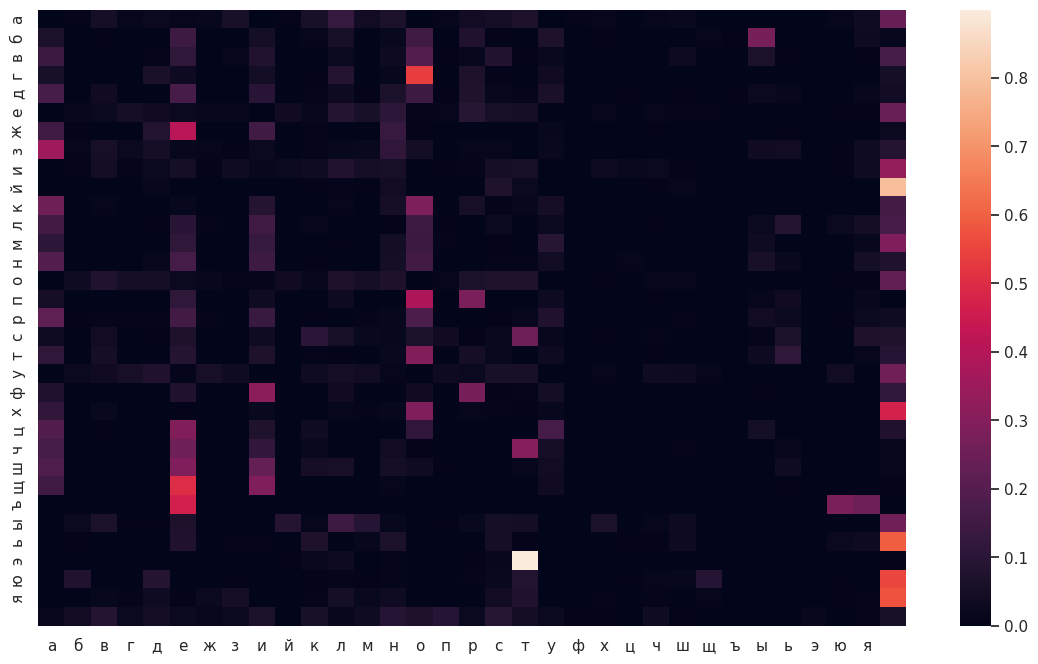

In [ ]:
dfr, result = make_trans_matrix(all_text)

# 4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [ ]:
all_words = dict()
prior = 1. / len(RUSSIAN)
start = POS_R['п']
end = POS_R['р']
best_proba = 0
for j in RUSSIAN:
  second = POS_R[j]
  for k in RUSSIAN:
    third = POS_R[k]
    proba = prior * result[start, second] * result[second, third] * result[third, end]
    if proba > 0:
      word = ''.join(['п', j, k, 'р'])
      print(word, proba)
      all_words[word] = proba
      if proba > best_proba:
        best_proba = proba
        best_word = word
print(f'Наиболее вероятное слово из 4 букв, начинающееся на п и оканчивающееся на р: "{best_word}". Его можно встретить  с  вероятностью {best_proba}')

паар 1.2861294615670748e-08
пабр 1.0463297912935638e-06
павр 1.1943064367697012e-06
пагр 1.323745150648832e-06
падр 3.0312598678340207e-06
паер 2.0094151071580564e-06
пажр 7.533524086065053e-09
пазр 1.2462329996322449e-06
паир 2.6249966485849846e-08
пайр 2.8436032855227694e-08
пакр 4.987544545420132e-06
палр 3.4630088933366065e-09
памр 1.126218932098043e-07
панр 1.1965181886103109e-07
паор 4.471186499829828e-08
папр 5.796884642842818e-06
парр 2.9572571724020078e-08
паср 5.196131991570188e-07
патр 5.699536966609488e-06
паур 7.133408841358231e-08
пафр 3.273120430827629e-06
пахр 2.5147823049456587e-07
пачр 2.7309274088930096e-08
пашр 5.425580532227317e-09
пащр 4.68289641627989e-09
паэр 3.5057943460701446e-10
паюр 1.6636372746661016e-07
паяр 1.5390975580435555e-07
па р 8.961162246215709e-06
пвар 2.891435354905608e-09
пвбр 1.642710111867701e-11
пввр 8.407285819330329e-12
пвгр 3.42172326649639e-11
пвдр 2.766956414021389e-10
пвер 5.213208176710744e-09
пвжр 4.027858049579562e-15
пвзр 8.7430971

Однако, несмотря на наибольшую вероятность появления, слова "прер" в Войне и мире нет! А какое из сгенерированных слов есть и встречается наиболее часто?

In [ ]:
word_count = {}

for file_name in [str(Path(ROOT,'tom_1.txt')), str(Path(ROOT,'tom_2.txt')),str(Path(ROOT,'tom_3.txt')),str(Path(ROOT,'tom_4.txt'))]:
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
        text = text.lower()
        text = re.sub(r'[^\w\sа-я.,!?-]', '', text)
        words = text.split()
        for word in words:
            if re.search(r'[a-zA-Z]', word) is None:
              if word not in word_count:
                  word_count[word] = 1
              else:
                  word_count[word] += 1

print(word_count)

{'лев': 8, 'толстой': 15, 'война': 49, 'и': 20539, 'мир': 39, 'том': 184, '1': 26, 'часть': 93, 'николаевич': 6, 'первая': 30, 'поместья,': 1, 'мой': 201, 'верный': 5, 'раб,': 4, 'ну,': 351, 'что,': 263, 'князь,': 102, 'генуа': 1, 'лукка': 1, 'стали': 124, 'не': 8737, 'больше,': 35, 'как': 4037, 'поместьями': 1, 'фамилии': 2, 'бонапарте.': 9, 'нет,': 356, 'я': 2983, 'вас': 270, 'предупреждаю,': 2, 'если': 207, 'вы': 995, 'мне': 677, 'скажете,': 2, 'что': 7426, 'у': 1285, 'нас': 147, 'война,': 11, 'еще': 1094, 'позволите': 9, 'себе': 508, 'защищать': 12, 'все': 1628, 'гадости,': 2, 'ужасы': 6, 'этого': 646, 'антихриста': 1, 'право,': 45, 'верю,': 5, 'он': 6324, 'антихрист': 1, 'больше': 276, 'знаю,': 149, 'уж': 160, 'друг': 201, 'мой,': 58, 'говорите.': 7, 'здравствуйте,': 11, 'здравствуйте.': 1, 'вижу,': 24, 'пугаю,': 1, 'садитесь': 1, 'рассказывайте.': 1, 'так': 1715, 'говорила': 219, 'в': 11100, 'июле': 2, '1805': 17, 'года': 64, 'известная': 9, 'анна': 208, 'павловна': 59, 'шерер,':

In [ ]:
for key in word_count.keys():
  for k in all_words.keys():
    if k == key:
      print(k, all_words[k])
      break

пьер 8.047128066747822e-06
петр 9.19871866475375e-06


Таким образом, лишь 2 слова из всех сгенерированных по условию содержатся в "Войне и мире"

# 5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [ ]:
s = []
start = 'б' # это первая буква
s.append(start) # Добавляем ее в список
length = 7 # будем генерировать последовательность длины n
for i in range(length):
    index = POS_R[s[i]]# Это значение i-го символа выборки в словаре POS_r ( фактически, это позиция символа в словаре из английскимх букв)
    next_char = np.random.choice(list(RUSSIAN), p=result[index]) # выбираем следующий случайный символ, но уже с вероятностью его нахождения после предыдущего
    s.append(next_char) # добавляем его в список

print (''.join(s))

белисшер


# 6.Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.

In [ ]:
series = pd.read_csv('/content/drive/MyDrive/TSML13_DZ1/Series/international-airline-passengers.csv')['Count']

In [ ]:
values = series.values.reshape(-1,1)

In [ ]:
for n in range(1, 12):
    best_score = 0
    model = hmm.GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    if model.score(values) < best_score:
      best_score = model.score(values)
      best_n = n
print ('n=', best_n, 'score =', best_score)

n= 11 score = -687.0109389742657


In [ ]:
model.transmat_.shape

(11, 11)

In [ ]:
model.transmat_

array([[8.81721317e-001, 4.44659081e-323, 5.03305458e-040,
        0.00000000e+000, 1.19232264e-121, 2.16103497e-176,
        0.00000000e+000, 3.95193229e-319, 1.18278683e-001,
        0.00000000e+000, 2.05741318e-236],
       [0.00000000e+000, 4.27012205e-014, 3.26661558e-150,
        3.88704393e-001, 3.05989736e-070, 9.09783802e-048,
        5.82844042e-001, 3.69073977e-082, 0.00000000e+000,
        2.84515648e-002, 2.32966592e-024],
       [2.96356483e-002, 4.19302181e-111, 8.82568693e-001,
        1.16960752e-108, 1.71752763e-003, 8.60643308e-002,
        1.63900700e-153, 6.80968564e-041, 1.38002170e-005,
        8.84942063e-292, 1.84331837e-045],
       [0.00000000e+000, 1.22039353e-017, 2.98553648e-095,
        1.08997525e-011, 4.97964000e-010, 3.22713861e-027,
        1.29271369e-019, 6.93482233e-021, 0.00000000e+000,
        4.47018333e-001, 5.52981667e-001],
       [3.39444983e-111, 6.04934878e-060, 3.30642317e-001,
        9.73006752e-057, 1.92727317e-033, 6.69354955e-001,
  

#7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

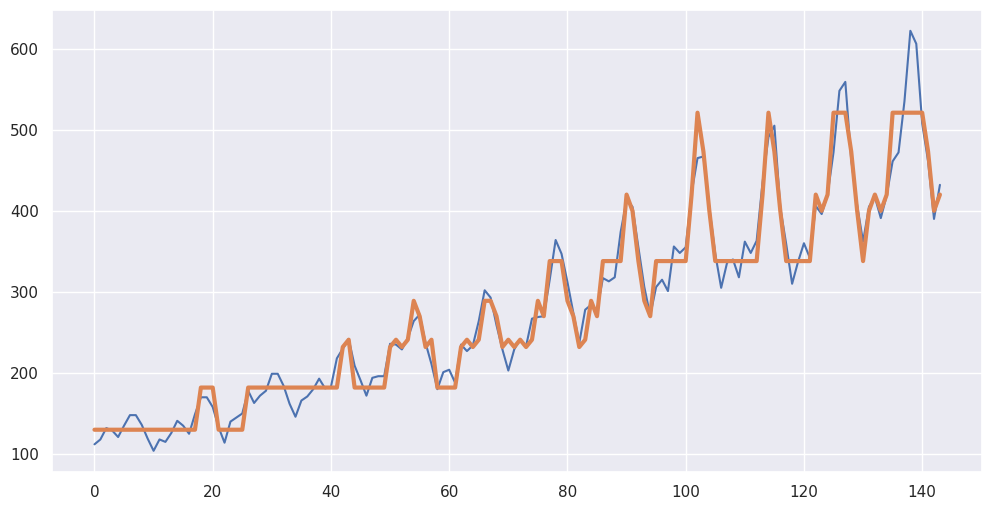

In [ ]:
# Выберем можель и передадим туда лучшее значение n_components
model = hmm.GaussianHMM(n_components=11,
                        covariance_type="diag",
                        n_iter=1000)
# Обучим модель
model.fit(values)
# получим прогнозные значения
labels = model.predict(values)
# инициализируем нулями массив средних значений компонент
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [ ]:
cur_value = labels[-1]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(best_n, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [ ]:
new_series = np.concatenate((values, np.array(predictions)))

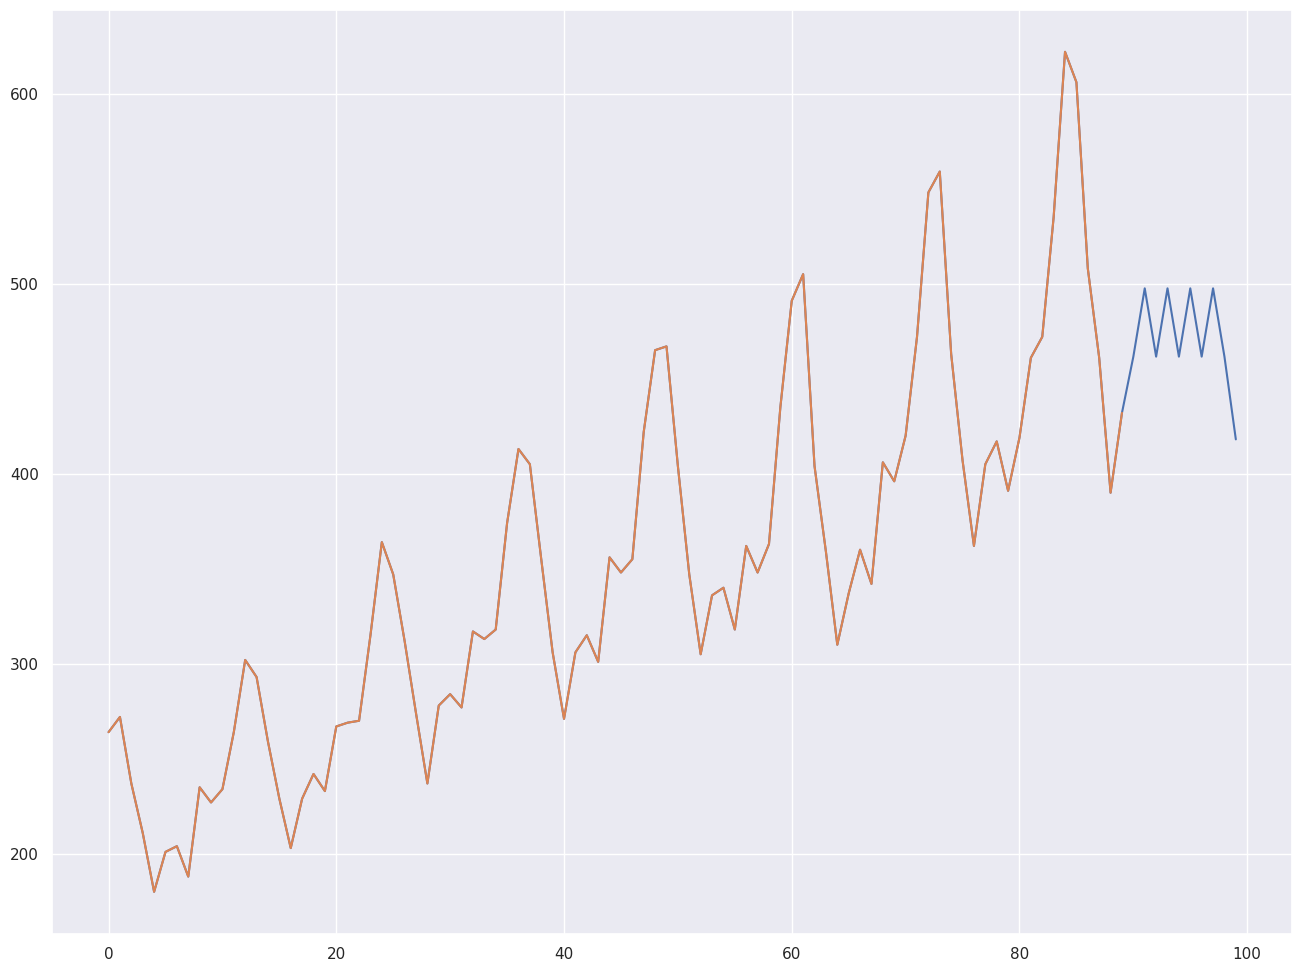

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()

In [ ]:
cur_value = labels[-11]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(best_n, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

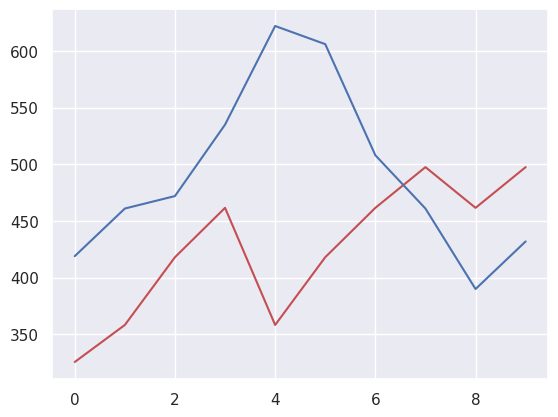

In [ ]:
plt.plot(predictions, 'r-')
plt.plot(values[-10:])
plt.show()